# **Fuzzy Clustering**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de calcul des distances euclidiennes de tous les pixels à tous les clusters
def compute_distances(image_pixels, cluster_centers):
    # Différences entre chaque pixel et chaque centre de cluster
    distances = np.linalg.norm(image_pixels[:, np.newaxis] - cluster_centers, axis=2)
    return distances

# Initialisation des degrés d'appartenance (aléatoire)
def initialize_membership_matrix(n_pixels, n_clusters):
    membership_matrix = np.random.rand(n_pixels, n_clusters)
    membership_matrix = membership_matrix / np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix

# Mise à jour des centres des clusters
def update_cluster_centers(image_pixels, membership_matrix, n_clusters, fuzziness):
    membership_matrix_fuzzified = membership_matrix ** fuzziness
    cluster_centers = (membership_matrix_fuzzified.T @ image_pixels) / np.sum(membership_matrix_fuzzified.T, axis=1, keepdims=True)
    return cluster_centers

# Mise à jour des degrés d'appartenance
def update_membership_matrix(distances, n_clusters, fuzziness):

    epsilon = 1e-10
    distances = np.maximum(distances, epsilon)

    exponent = 2 / (fuzziness - 1)
    inv_distances = 1.0 / distances
    inv_distances_powered = inv_distances ** exponent

    membership_matrix = inv_distances_powered / np.sum(inv_distances_powered, axis=1, keepdims=True)

    return membership_matrix

# Fuzzy C-Means Clustering
def fuzzy_c_means(image, n_clusters=3, fuzziness=2, max_iter=100, error=1e-5):
    # Convertir l'image en un tableau de pixels
    image_pixels = image.reshape((-1, 3)).astype(np.float64)
    n_pixels = len(image_pixels)
    # Initialisation de la matrice de degrés d'appartenance
    membership_matrix = initialize_membership_matrix(n_pixels, n_clusters)

    for iteration in range(max_iter):
        # Mise à jour des centres des clusters
        cluster_centers = update_cluster_centers(image_pixels, membership_matrix, n_clusters, fuzziness)

        # Calcul des distances
        distances = compute_distances(image_pixels, cluster_centers)
        old_membership_matrix = membership_matrix.copy()

        membership_matrix = update_membership_matrix(distances, n_clusters, fuzziness)

        # Vérification de la convergence
        if np.linalg.norm(membership_matrix - old_membership_matrix) < error:
            print(f"Convergence atteinte après {iteration+1} itérations.")
            break
    segmented_image = np.argmax(membership_matrix, axis=1).reshape(image.shape[:2])

    return segmented_image, cluster_centers




In [8]:
import cv2
# Fonction d'affichage
def display_image_per_cluster(image, segmented_image, cluster_centers):
    n_clusters = len(cluster_centers)
    plt.figure(figsize=(15, 5))

    for cluster_idx in range(n_clusters):
        # Créer image où seuls les pixels du cluster actuel sont affichés
        cluster_image = np.zeros_like(image)
        # Attribuer aux pixels du cluster actuel leur couleur d'origine
        cluster_image[segmented_image == cluster_idx] = image[segmented_image == cluster_idx]
        # Affichage du cluster
        plt.subplot(1, n_clusters, cluster_idx + 1)
        plt.title(f"Cluster {cluster_idx + 1}")
        plt.imshow(cv2.cvtColor(cluster_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

**Exemple Segmentation Mily way RGB**

Convergence atteinte après 94 itérations.


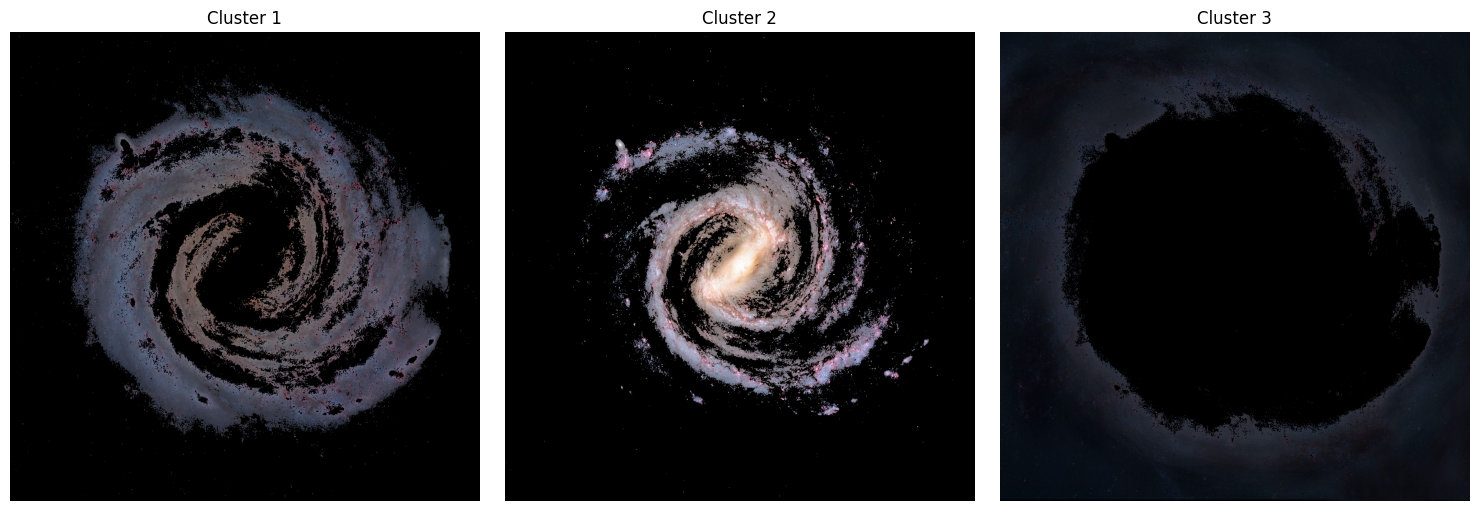

In [9]:

image = cv2.imread('milky-way.jpg')
n_clusters = 3
segmented_image, cluster_centers = fuzzy_c_means(image, n_clusters=n_clusters)
display_image_per_cluster(image, segmented_image, cluster_centers)

**Exemple Segmentation Mily way GRAY**

Convergence atteinte après 99 itérations.


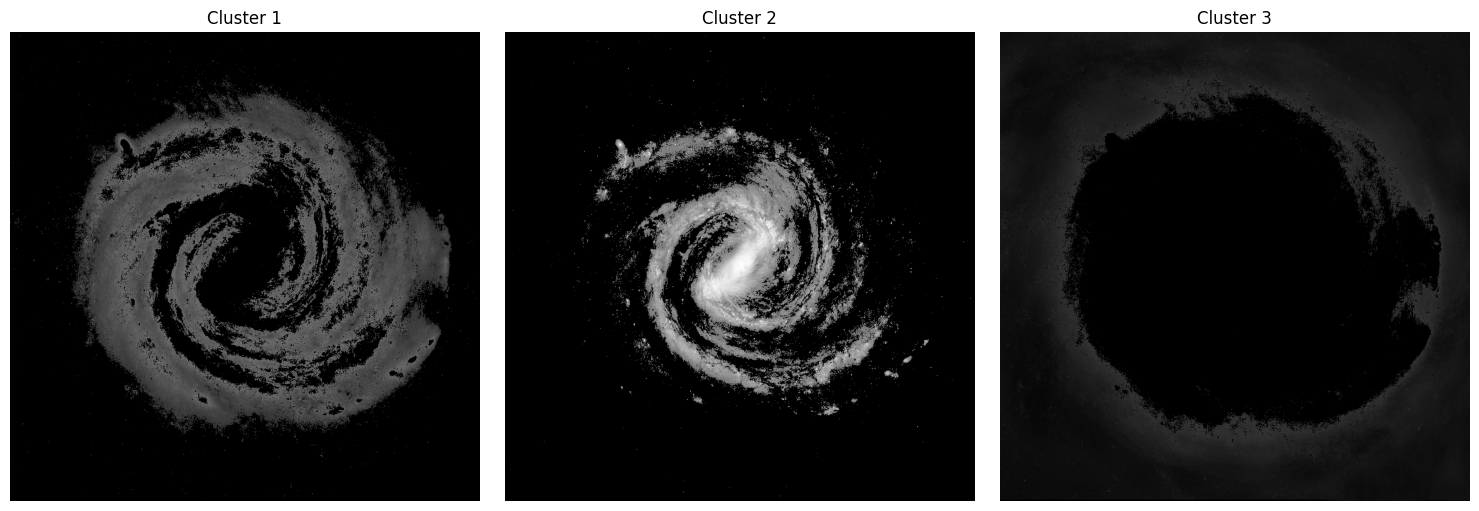

In [10]:

image = cv2.imread('milky-way-nvg.jpg')
n_clusters = 3
segmented_image, cluster_centers = fuzzy_c_means(image, n_clusters=n_clusters)
display_image_per_cluster(image, segmented_image, cluster_centers)

**Exemple Segmentation HAK RGB**

Convergence atteinte après 51 itérations.


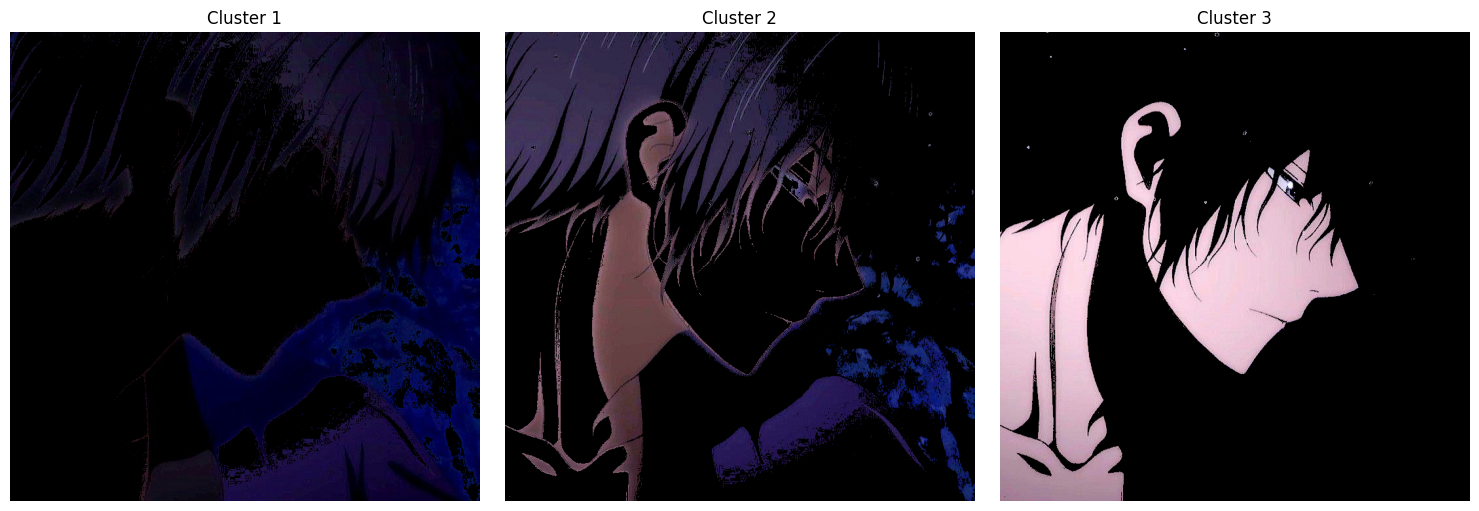

In [11]:
image = cv2.imread('Hak.jpg')
n_clusters = 3
segmented_image, cluster_centers = fuzzy_c_means(image, n_clusters=n_clusters)
display_image_per_cluster(image, segmented_image, cluster_centers)